# Animal_Bites_Data_Storytelling_Mini_Project

In [1]:
# importing necessary libraries/modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bites_df = pd.read_csv('Health_AnimalBites.csv')
bites_df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [3]:
bites_df.tail(3)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
9000,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
9001,2017-09-07 00:00:00,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN
9002,2017-09-07 00:00:00,DOG,BOXER,NaN,BRN BLK,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [4]:
# DF info and shape
print(bites_df.info())
print(bites_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB
None
(9003, 15)


In [5]:
# Number of missing values in each column
print(bites_df.isnull().sum())

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64


In [6]:
# Unique values
print(bites_df.nunique())

bite_date            2702
SpeciesIDDesc           9
BreedIDDesc           101
GenderIDDesc            3
color                 712
vaccination_yrs         4
vaccination_date     2107
victim_zip            233
AdvIssuedYNDesc         2
WhereBittenIDDesc       3
quarantine_date       602
DispositionIDDesc       4
head_sent_date        325
release_date          582
ResultsIDDesc           3
dtype: int64


In [7]:
bites_df.describe(include='all')

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
count,8686,8885,3759,6477,6426,3738.000000,4115,7165,2565,8387,2020,1535,395,1445,1543
unique,2702,9,101,3,712,NaN,2107,233,2,3,602,4,325,582,3
top,2017-08-15 00:00:00,DOG,PIT BULL,MALE,BLACK,NaN,2015-10-01 00:00:00,40272,NO,BODY,2010-04-05 00:00:00,RELEASED,2010-05-21 00:00:00,2016-07-05 00:00:00,UNKNOWN
freq,13,7029,1102,3832,671,NaN,8,376,1914,6213,18,912,4,13,1240
mean,NaN,NaN,NaN,NaN,NaN,1.452113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.848416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Rename columns for readability and clarity
bites_df.rename(columns={
    'SpeciesIDDesc': 'species',
    'BreedIDDesc': 'breed',
    'GenderIDDesc': 'gender',
    'AdvIssuedYNDesc': 'advisory_issued',
    'WhereBittenIDDesc': 'bitten_location',
    'DispositionIDDesc': 'animal_disposition',
    'ResultsIDDesc': 'test_results'
}, inplace=True)

# Drop rows with missing key storytelling columns
bites_df.dropna(subset=['bite_date', 'species', 'bitten_location'], inplace=True)

# Fill other key categoricals with 'Unknown'
bites_df.fillna({'breed': 'Unknown', 'color': 'Unknown', 'gender': 'Unknown'}, inplace=True)

# Convert date columns to datetime
date_cols = ['bite_date', 'vaccination_date', 'quarantine_date', 'head_sent_date', 'release_date']
for col in date_cols:
    bites_df[col] = pd.to_datetime(bites_df[col], errors='coerce')

# Standardize category strings
bites_df['species'] = bites_df['species'].str.strip().str.title()
bites_df['gender'] = bites_df['gender'].str.strip().str.title()
bites_df['bitten_location'] = bites_df['bitten_location'].str.strip().str.title()
bites_df['advisory_issued'] = bites_df['advisory_issued'].str.strip().str.title()
bites_df['animal_disposition'] = bites_df['animal_disposition'].str.strip().str.title()
bites_df['test_results'] = bites_df['test_results'].str.strip().str.title()

# Drop duplicates
bites_df = bites_df.drop_duplicates()

In [9]:
bites_df.head()

,bite_date,species,breed,gender,color,vaccination_yrs,vaccination_date,victim_zip,advisory_issued,bitten_location,quarantine_date,animal_disposition,head_sent_date,release_date,test_results
0,1985-05-05,Dog,Unknown,Female,LIG. BROWN,1.0,1985-06-20,40229,No,Body,1985-05-05,Unknown,NaT,NaT,Unknown
1,1986-02-12,Dog,Unknown,Unknown,BRO & BLA,NaN,NaT,40218,No,Body,1986-02-12,Unknown,NaT,NaT,Unknown
2,1987-05-07,Dog,Unknown,Unknown,Unknown,NaN,NaT,40219,No,Body,1990-05-07,Unknown,NaT,NaT,Unknown
3,1988-10-02,Dog,Unknown,Male,BLA & BRO,NaN,NaT,NaN,No,Body,1990-10-02,Unknown,NaT,NaT,Unknown
4,1989-08-29,Dog,Unknown,Female,BLK-WHT,NaN,NaT,NaN,No,Body,NaT,Unknown,NaT,NaT,Unknown


In [10]:
bites_df.tail(3)

,bite_date,species,breed,gender,color,vaccination_yrs,vaccination_date,victim_zip,advisory_issued,bitten_location,quarantine_date,animal_disposition,head_sent_date,release_date,test_results
9000,2017-09-07,Dog,LABRADOR RETRIV,Male,BROWN,NaN,NaT,47130,NaN,Unknown,NaT,NaN,NaT,NaT,NaN
9001,2017-09-07,Dog,LABRADOR RETRIV,Female,BLK WHT,NaN,NaT,40229,NaN,Body,NaT,NaN,NaT,NaT,NaN
9002,2017-09-07,Dog,BOXER,Unknown,BRN BLK,NaN,NaT,40229,NaN,Body,NaT,NaN,NaT,NaT,NaN


In [11]:
bites_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8256 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bite_date           8255 non-null   datetime64[ns]
 1   species             8256 non-null   object        
 2   breed               8256 non-null   object        
 3   gender              8256 non-null   object        
 4   color               8256 non-null   object        
 5   vaccination_yrs     3592 non-null   float64       
 6   vaccination_date    3958 non-null   datetime64[ns]
 7   victim_zip          6607 non-null   object        
 8   advisory_issued     2503 non-null   object        
 9   bitten_location     8256 non-null   object        
 10  quarantine_date     1994 non-null   datetime64[ns]
 11  animal_disposition  1531 non-null   object        
 12  head_sent_date      204 non-null    datetime64[ns]
 13  release_date        1396 non-null   datetime64[ns]
 1

In [12]:
# Recode advisory_issued column
bites_df['advisory_issued'] = bites_df['advisory_issued'].map({'Yes': 1, 'No': 0})

# Group rare breeds under "Other" (threshold: < 50 appearances)
breed_counts = bites_df['breed'].value_counts()
rare_breeds = breed_counts[breed_counts < 50].index
bites_df['breed'] = bites_df['breed'].replace(rare_breeds, 'Other')

# Group rare colors under "Other" (threshold: < 50 appearances)
color_counts = bites_df['color'].value_counts()
rare_colors = color_counts[color_counts < 50].index
bites_df['color'] = bites_df['color'].replace(rare_colors, 'Other')

# Drop low-use columns
bites_df.drop(columns=['head_sent_date'], inplace=True)

In [13]:
bites_df.head()

,bite_date,species,breed,gender,color,vaccination_yrs,vaccination_date,victim_zip,advisory_issued,bitten_location,quarantine_date,animal_disposition,release_date,test_results
0,1985-05-05,Dog,Unknown,Female,Other,1.0,1985-06-20,40229,0.0,Body,1985-05-05,Unknown,NaT,Unknown
1,1986-02-12,Dog,Unknown,Unknown,Other,NaN,NaT,40218,0.0,Body,1986-02-12,Unknown,NaT,Unknown
2,1987-05-07,Dog,Unknown,Unknown,Unknown,NaN,NaT,40219,0.0,Body,1990-05-07,Unknown,NaT,Unknown
3,1988-10-02,Dog,Unknown,Male,Other,NaN,NaT,NaN,0.0,Body,1990-10-02,Unknown,NaT,Unknown
4,1989-08-29,Dog,Unknown,Female,BLK-WHT,NaN,NaT,NaN,0.0,Body,NaT,Unknown,NaT,Unknown


In [14]:
bites_df.tail(3)

,bite_date,species,breed,gender,color,vaccination_yrs,vaccination_date,victim_zip,advisory_issued,bitten_location,quarantine_date,animal_disposition,release_date,test_results
9000,2017-09-07,Dog,LABRADOR RETRIV,Male,BROWN,NaN,NaT,47130,NaN,Unknown,NaT,NaN,NaT,NaN
9001,2017-09-07,Dog,LABRADOR RETRIV,Female,BLK WHT,NaN,NaT,40229,NaN,Body,NaT,NaN,NaT,NaN
9002,2017-09-07,Dog,BOXER,Unknown,BRN BLK,NaN,NaT,40229,NaN,Body,NaT,NaN,NaT,NaN


In [15]:
df = bites_df.copy()

In [48]:
df.to_csv('animal_bites.csv', index=False)

## Bites over time

### How many bites occurred each year/month?

In [17]:
# Setting plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

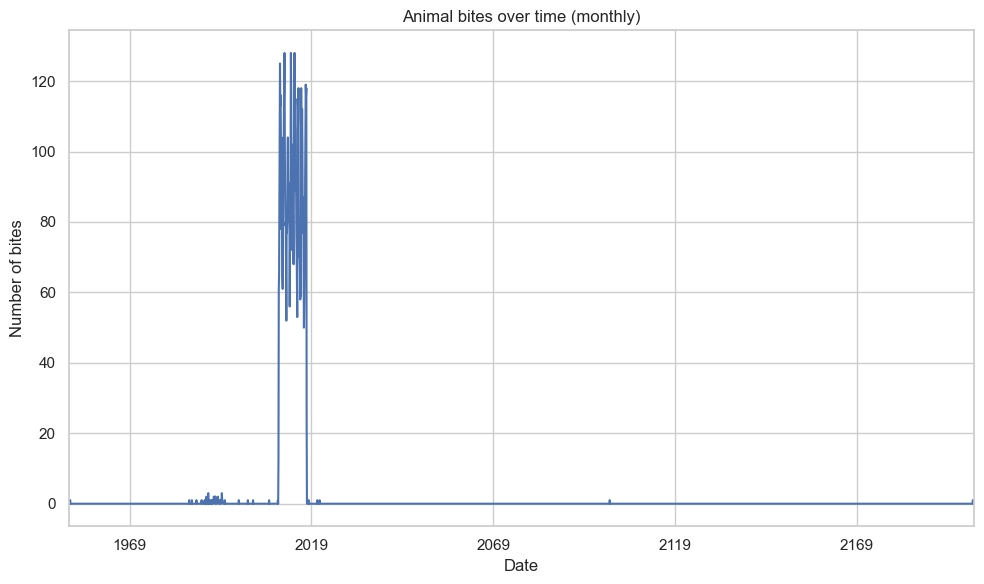

In [19]:
monthly_bites = df.set_index('bite_date').resample('ME').size()
monthly_bites.plot()
plt.title('Animal bites over time (monthly)')
plt.xlabel('Date')
plt.ylabel('Number of bites')
plt.tight_layout()
plt.show()

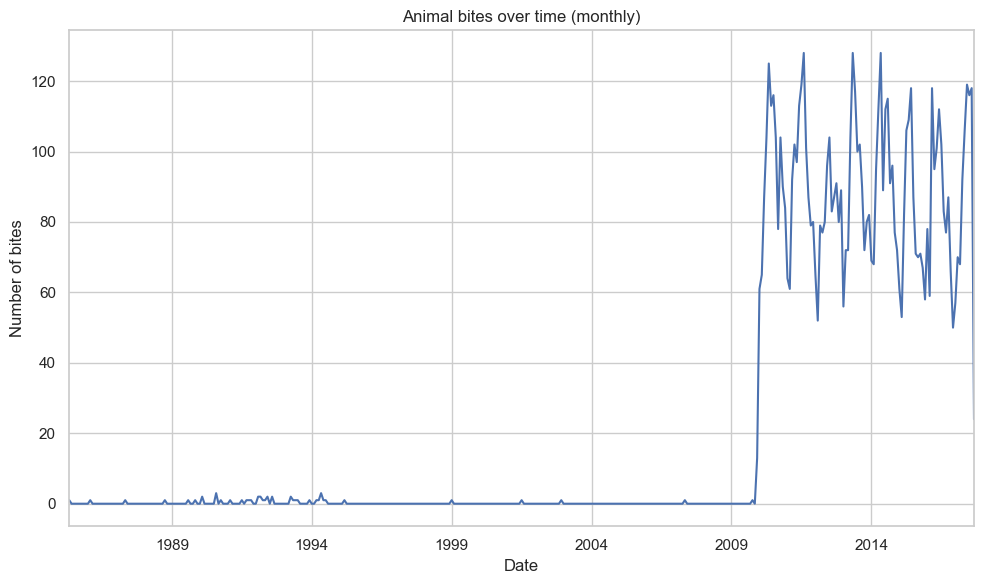

In [22]:
# There are some dates that go past the original data's timeline
# Filtering the df so that it's between 1985 and 2017
filtered_df = df[(df['bite_date'].dt.year >= 1985) & (df['bite_date'].dt.year <= 2017)]
monthly_bites_filtered = filtered_df.set_index('bite_date').resample('ME').size()
monthly_bites_filtered.plot()
plt.title('Animal bites over time (monthly)')
plt.xlabel('Date')
plt.ylabel('Number of bites')
plt.tight_layout()
plt.show()

After 2009, the number of bites reported rocket up and stays in a consistent looking pattern for the rest of the timeline.

We should take a closer look at a couple of years to see if what the pattern looks like from 2009 until 2017

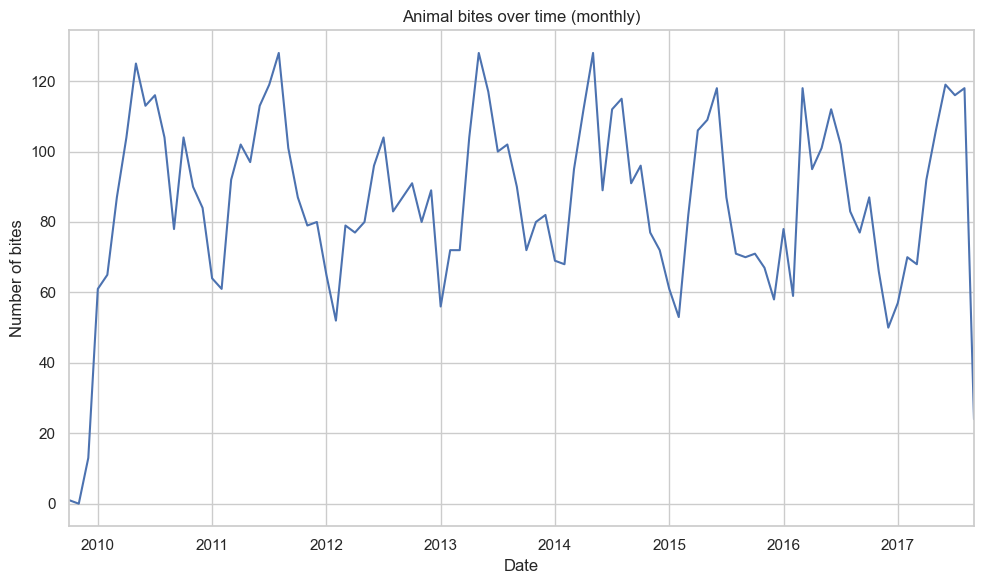

In [23]:
y2009_y2017_bites_df = df[(df['bite_date'].dt.year >= 2009) & (df['bite_date'].dt.year <= 2017)]
monthly_bites = y2009_y2017_bites_df.set_index('bite_date').resample('ME').size()
monthly_bites.plot()
plt.title('Animal bites over time (monthly)')
plt.xlabel('Date')
plt.ylabel('Number of bites')
plt.tight_layout()
plt.show()

 - The recurring spike looks to be around mid-year for every year.
 - This suggests that it's a seasonal trend and that when the weather is warmer, more people are active outdoors with their pets and thus increasing the chance someone will be bitten.
 - Let's plot out the frequency of bites on a month-to-month basis across every year to explore that idea.

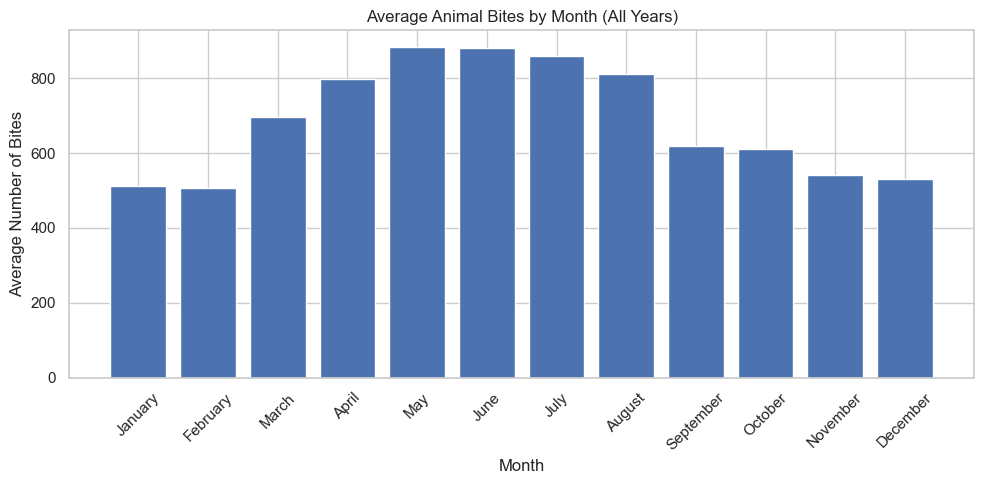

In [24]:
# Extract month name for all entries
df['Month'] = df[date_cols[0]].dt.month_name()

# Group by month (across all years) and get average bites
monthly_avg = df.groupby('Month').size().reset_index(name='AvgBites')

# To ensure correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values('Month')

# Plot
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg['Month'], monthly_avg['AvgBites'])
plt.title("Average Animal Bites by Month (All Years)")
plt.xlabel("Month")
plt.ylabel("Average Number of Bites")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Sure enough! The most frequent number of reported animal bites happen during the middle of the year.
- Middle of the year tends to be the warmest time of the year in the U.S., so this aligns with the idea that more people are active outdoors with their pets or encountering other animals.

### Are bite incidents rising or falling over time?

We will focus more on the data between 2010 and 2017 since the data is much more sparse before then.

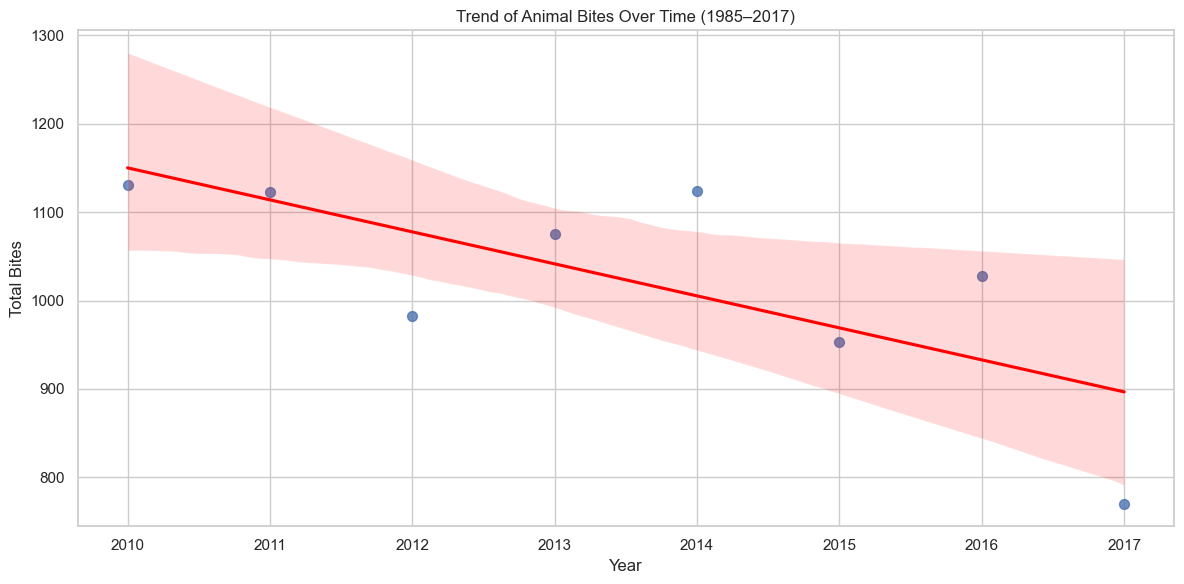

In [25]:
# Group by year only and count bites
df['Year'] = df[date_cols[0]].dt.year
yearly_trend = df.groupby('Year').size().reset_index(name='TotalBites')

# Filter to only 2010–2017
yearly_trend = yearly_trend[(yearly_trend['Year'] >= 2010) & (yearly_trend['Year'] <= 2017)]

# Plot with trendline
plt.figure(figsize=(12, 6))
sns.regplot(data=yearly_trend, x='Year', y='TotalBites', marker='o', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title("Trend of Animal Bites Over Time (1985–2017)")
plt.xlabel("Year")
plt.ylabel("Total Bites")
plt.grid(True)
plt.tight_layout()
plt.show()

- There looks to be a decline, but there isn't anymore data past 2017 to tell for certain.

## Animal types

### What species are responsible for the most bites?

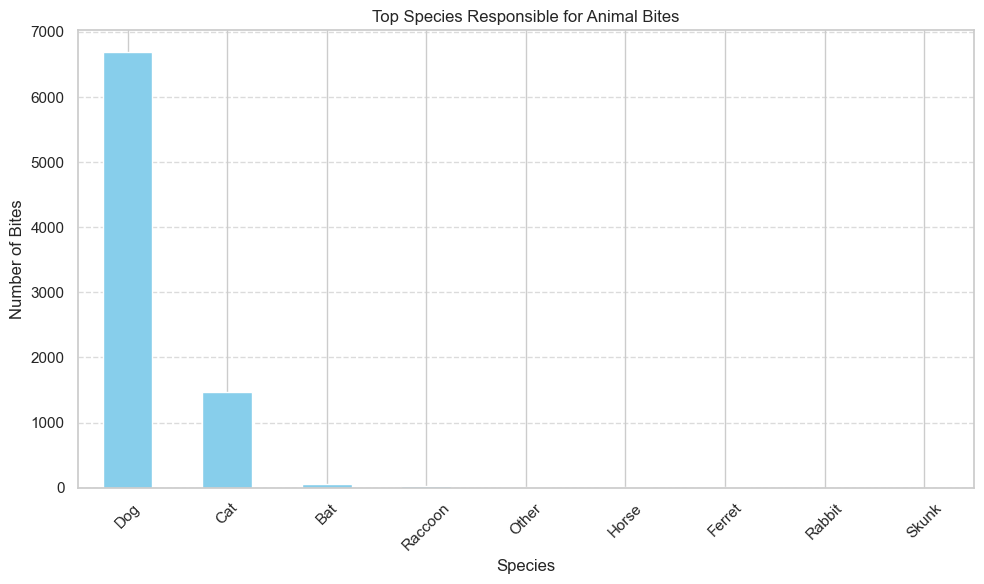

In [26]:
# Top species responsible for the bites
top_species = df['species'].value_counts()

# Plotting the top species
plt.figure(figsize=(10, 6))
top_species.plot(kind='bar', color='skyblue')
plt.title('Top Species Responsible for Animal Bites')
plt.xlabel('Species')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# Calculate percentage of bites by species
species_percent = (df['species'].value_counts(normalize=True) * 100).round(2)
species_percent = species_percent.head(10).reset_index()
species_percent.columns = ['Species', 'Percentage of Total Bites']

species_percent

,Species,Percentage of Total Bites
0,Dog,81.02
1,Cat,17.79
2,Bat,0.71
3,Raccoon,0.23
4,Other,0.10
5,Horse,0.06
6,Ferret,0.05
7,Rabbit,0.02
8,Skunk,0.01


- Dogs account for the vast majority of animal bites recorded, with 81% of reported bites being from them.
- Which breed of dog accounts for this?

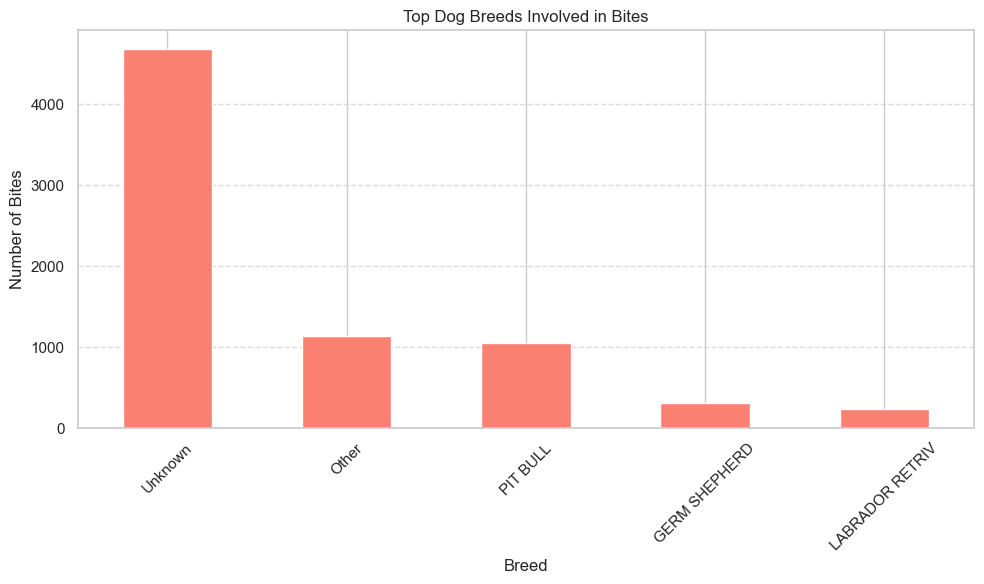

In [30]:
top_breeds = df['breed'].value_counts().head()
# Plot top dog breeds involved in bites
plt.figure(figsize=(10, 6))
top_breeds.plot(kind='bar', color='salmon')
plt.title('Top Dog Breeds Involved in Bites')
plt.xlabel('Breed')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
top_breeds.head()

breed
Unknown            4678
Other              1142
PIT BULL           1051
GERM SHEPHERD       314
LABRADOR RETRIV     234
Name: count, dtype: int64

 - Although the vas majority of bites were caused by dogs in the created _unknown_ category. These could be dogs where they are mixed breed and it may not be obvious what they are a mix of or they have no vet records.
 - The most common known breed to have been recorded for biting is the pitbull by a much wider margin than the german shepard and lab retriever.
 - _Other_ category leads before pit bull, meaning there is a bit of a tail to the data of a whole bunch of other dog species recorded.

### Most common bite locations from the dominant biting species?

In [33]:
# Check top locations on body where bites occurred
top_bite_locations = df['bitten_location'].value_counts().head(10) 
top_bite_locations

bitten_location
Body       6125
Head       1229
Unknown     902
Name: count, dtype: int64

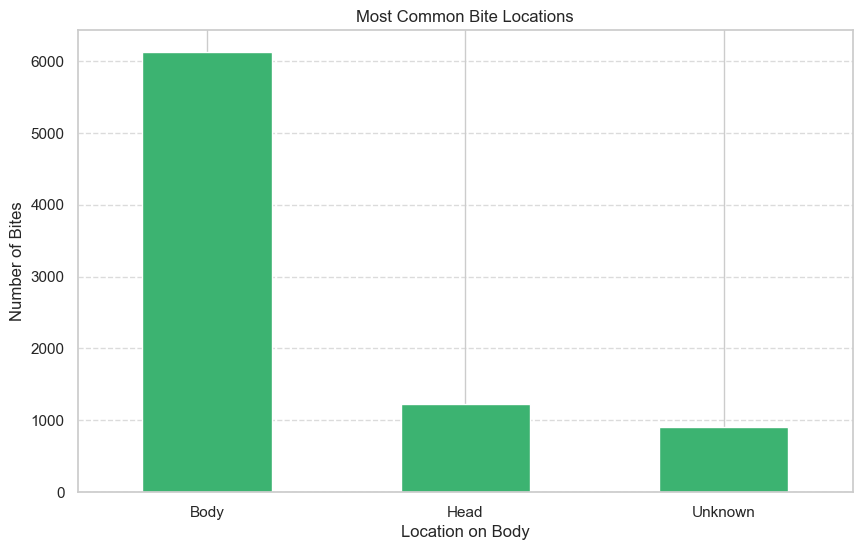

In [36]:
# Top bite locations plot
plt.figure(figsize=(10, 6))
top_bite_locations.plot(kind='bar', color='mediumseagreen')
plt.title('Most Common Bite Locations')
plt.xlabel('Location on Body')
plt.ylabel('Number of Bites')
plt.tick_params(axis='x', rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Bites on the body look to be the most common, although the data doesn't specify where on the body (other than the head).
- Still, over 1,200 recording of being bit on the head is concerning.

### Who are the biggest offenders for head bites?

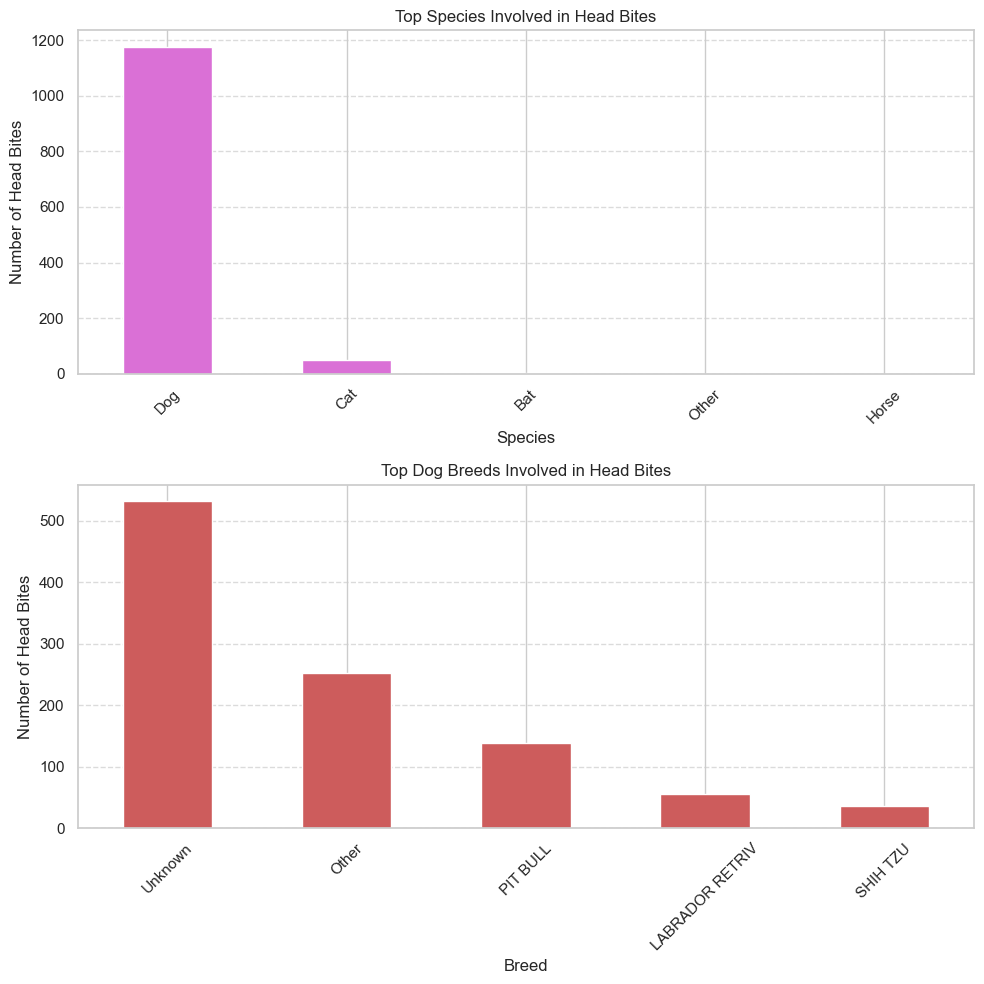

In [49]:
# Filter for head bite cases
head_bite_df = df[df['bitten_location'] == 'Head']

# Top species for head bites
head_bite_species = head_bite_df['species'].value_counts().head(5)

# Top dog breeds for head bites
head_bite_breeds = head_bite_df[head_bite_df['species'] == 'Dog']['breed'].value_counts().head(5)


# Create side-by-side bar plots for head bite species and dog breeds

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot top species for head bites
head_bite_species.plot(kind='bar', color='orchid', ax=ax[0])
ax[0].set_title('Top Species Involved in Head Bites')
ax[0].set_xlabel('Species')
ax[0].set_ylabel('Number of Head Bites')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot top dog breeds for head bites
head_bite_breeds.plot(kind='bar', color='indianred', ax=ax[1])
ax[1].set_title('Top Dog Breeds Involved in Head Bites')
ax[1].set_xlabel('Breed')
ax[1].set_ylabel('Number of Head Bites')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- Dogs are still overwhelmingly responsible for head bites.
- Unknown and other dog breeds still account as the most frequently recorded.
- Pit bulls again are atop the most clearly-identified breed.

## Victim/Gender dynamics

### Are males or females more commonly biting?

In [37]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
Male       3686
Unknown    2634
Female     1936
Name: count, dtype: int64

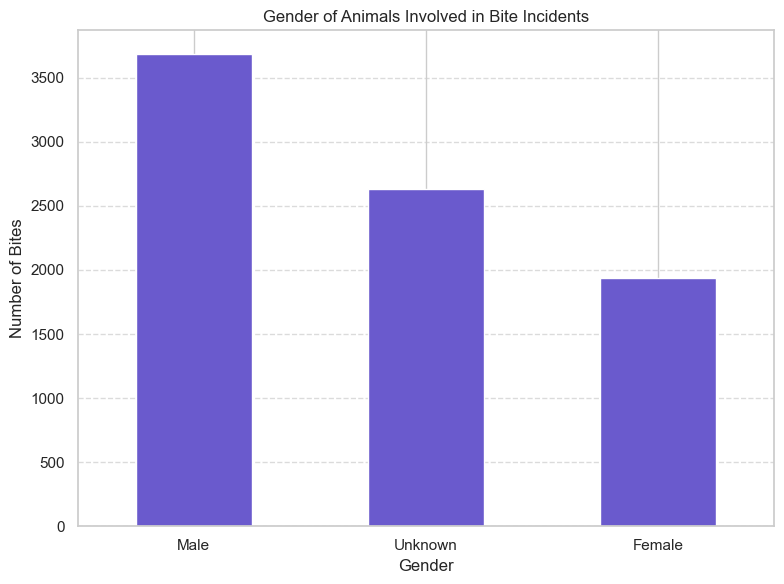

In [38]:
# Bar plot for gender distribution in bite cases
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='slateblue')
plt.title('Gender of Animals Involved in Bite Incidents')
plt.xlabel('Gender')
plt.ylabel('Number of Bites')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Male animals are more frequently recorded to be involved with biting than females and animals of unknown gender.
- The big presence of unknown gender further suggests documentation issues.
- We will look a bit more at the unknown gender.

### Which species and breed have the most unknown gender?

**Unreported or strays?**

In [40]:
# Filtering data by unknown gender
unknown_gender = df[df['gender'] == 'Unknown']

# Count species and breed within the unknown gender group
unknown_species = unknown_gender['species'].value_counts().head()
unknown_breed = unknown_gender['breed'].value_counts().head()

unknown_species, unknown_breed

(species
 Dog        1961
 Cat         579
 Bat          59
 Raccoon      19
 Other         8
 Name: count, dtype: int64,
 breed
 Unknown            1935
 PIT BULL            264
 Other               186
 GERM SHEPHERD        72
 LABRADOR RETRIV      35
 Name: count, dtype: int64)

- Even with unknown gender cases, dogs -- especially pit bulls -- are still the most frequent.
- "Unknown" status could reflect that the recorded animals have no vet records or are strays.

## Vaccination/Advisory

### Are most biting animals vaccinated?

In [41]:
# Count the vaccination status
vaccination_status = df['vaccination_yrs'].value_counts(dropna=False)
vaccination_status.head(10)

vaccination_yrs
NaN     4664
1.0     2780
3.0      805
2.0        6
11.0       1
Name: count, dtype: int64

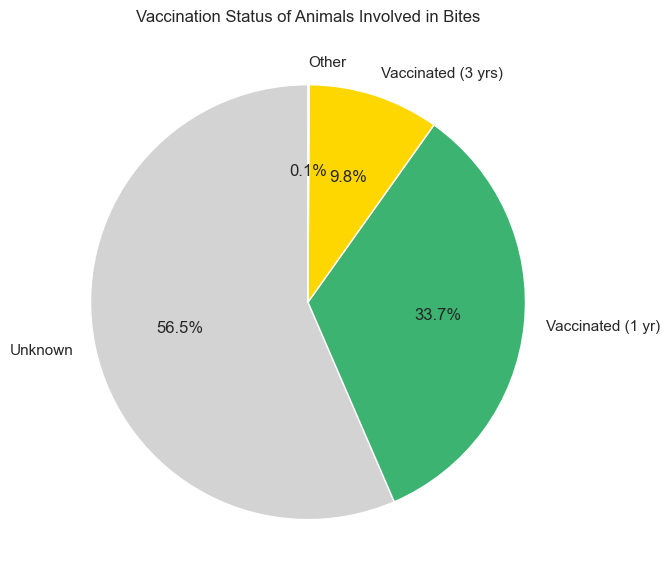

In [42]:
# Prep for a pe chart
vaccination_pie_data = pd.Series({
    'Unknown': vaccination_status.get(np.nan, 0),
    'Vaccinated (1 yr)': vaccination_status.get(1.0, 0),
    'Vaccinated (3 yrs)': vaccination_status.get(3.0, 0),
    'Other': vaccination_status.sum() - vaccination_status.get(np.nan, 0) - vaccination_status.get(1.0, 0) - vaccination_status.get(3.0, 0)
})

# Plot pie chart
plt.figure(figsize=(8, 6))
vaccination_pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgrey', 'mediumseagreen', 'gold', 'salmon'])
plt.title('Vaccination Status of Animals Involved in Bites')
plt.ylabel('')
plt.tight_layout()
plt.show()

- Only a modest portion of animals have been recorded to have been vaccinated, with the majority of vaccinated animals having only been recently updated with a vaccination at the time of biting. 
- Over half the bites have an unknown vaccination status. This again could be due to poor record-keeping or low compliance. 

### Which species/breeds have the most unknown vaccination history?

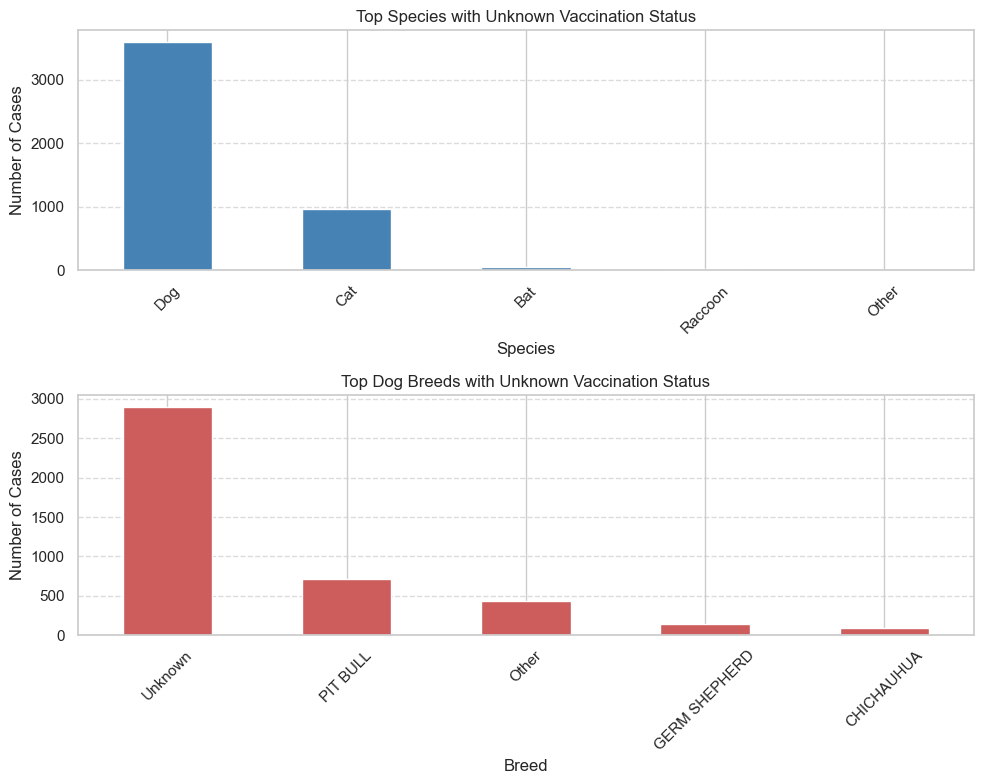

In [47]:
# Count for species and breeds with an unknown vaccination history
no_vacc_df = df[df['vaccination_yrs'].isna()]
no_vacc_species = no_vacc_df['species'].value_counts().head()
no_vacc_breed = no_vacc_df['breed'].value_counts().head()

fig, ax = plt.subplots(2,1, figsize=(10,8))

# Species bar plot
no_vacc_species.plot(kind='bar', color='steelblue', ax=ax[0])
ax[0].set_title('Top Species with Unknown Vaccination Status')
ax[0].set_xlabel('Species')
ax[0].set_ylabel('Number of Cases')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Breeds bar plot
no_vacc_breed.plot(kind='bar', color='indianred', ax=ax[1])
ax[1].set_title('Top Dog Breeds with Unknown Vaccination Status')
ax[1].set_xlabel('Breed')
ax[1].set_ylabel('Number of Cases')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- Dogs once again dominate the cases of unknown vaccination.
- Dog breeds with an unknown breed are also dominating the frequency of unknown vaccination status.
- Of the recorded breeds, pit bulls again are the most frequently recorded breed of this category. 

## What becomes of the animals after they bite someone?

In [43]:
# Disposition counts
disposition_counts = df['animal_disposition'].value_counts()
disposition_counts

animal_disposition
Released    909
Unknown     603
Killed       16
Died          3
Name: count, dtype: int64

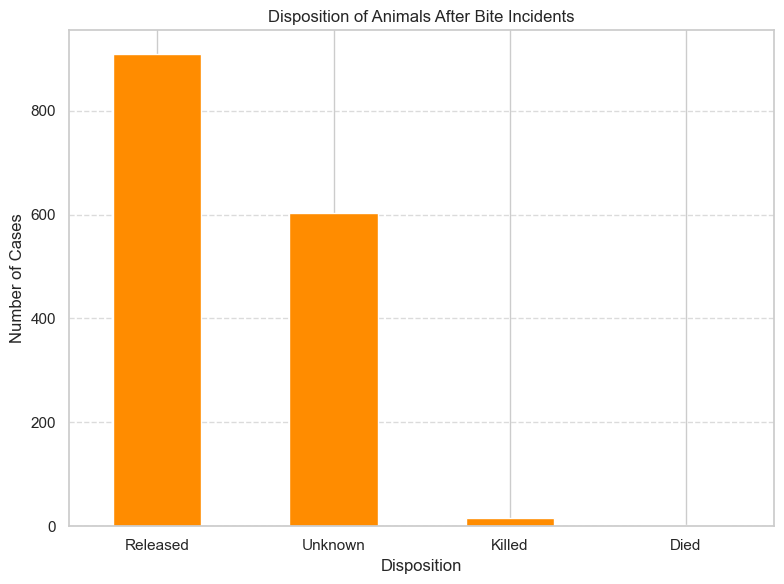

In [44]:
# Plot bar chart for disposition outcomes
plt.figure(figsize=(8, 6))
disposition_counts.plot(kind='bar', color='darkorange')
plt.title('Disposition of Animals After Bite Incidents')
plt.xlabel('Disposition')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Most of the animals of that were recorded to have bitten someone were eventually released.
- However, lots of the recorded animals biting have an unknown status. This again could likely be due to poor record keeping of the incidents.

## Findings and hypothesis

What we have seen exploring the data about the recorded animal bites in the Louisville, KY area:

- **Dogs** were by the far the most commonly reported animal for biting someone. With cats being a distant second.
- **Pit bulls** are the most commonly reported breed, especially in **head bites** and among animals with an unknown vaccination status.
- **Body bites** are the most frequently reported areas of being bitten. Of the 1,200 **head bites** recorded, most are from dogs -- a potential marker of more serious head injury.
- **Male animals** are more often reported than females; **Gender unknown** in many cases.
- Over half the cases were **without a known vaccination record**. Dogs (namely pit bulls of the identified breeds) lead this category.
-  **Unknown disposition outcomes** suggests that there are gaps in enforcement or follow-up.
-  There is a **seasonal trend** of recorded bites, with the highest frequency being between **May through August**.

# Hypothesis

Dog bites -- especially pit bulls and those of an unknown breed or vaccination status -- pose a greater public health risk, particularly when documentation is incomplete or bite locations are more serious like head injuries. 